<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/Fashion_Model_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seeding for Reproducibility**

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Data Processing

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_labels[0])

9


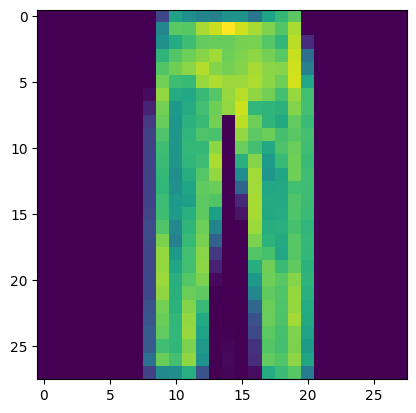

In [ ]:
plt.imshow(train_images[16])
plt.show()

In [ ]:
print(train_labels[16])

1


In [ ]:
# Normalizing the pixel values so that they come in range(0,1)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Reshaping images to specify that it is a single channel (Grayscale image)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
print(train_images.shape)

(60000, 28, 28, 1)


**CNN**

In [ ]:
# Building the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 68s 35ms/step - loss: 0.4907 - accuracy: 0.8210 - val_loss: 0.3626 - val_accuracy: 0.8695
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3189 - accuracy: 0.8832 - val_loss: 0.3146 - val_accuracy: 0.8878
Epoch 3/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2716 - accuracy: 0.8998 - val_loss: 0.2879 - val_accuracy: 0.8974
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2415 - accuracy: 0.9100 - val_loss: 0.2782 - val_accuracy: 0.8973
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.2720 - val_accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1958 - accuracy: 0.9273 - val_loss: 0.2583 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1803 - accuracy: 0.9336 - val_loss: 0.2770 -

**Model Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy:", test_acc)

313/313 - 2s - loss: 0.2693 - accuracy: 0.9083 - 2s/epoch - 8ms/step
Test Accuracy: 0.90829998254776


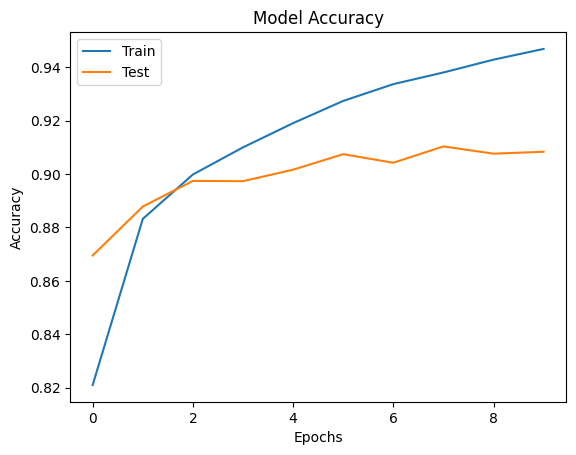

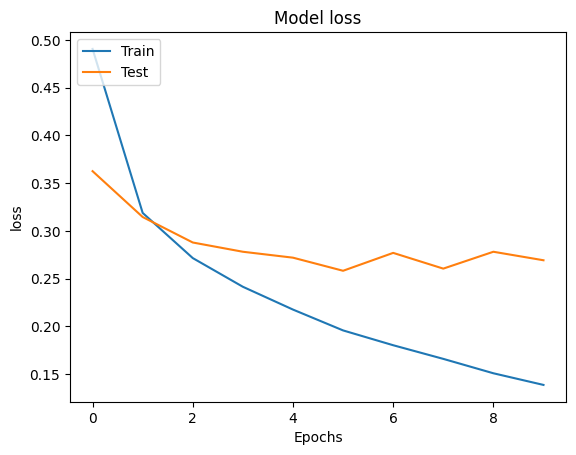

In [ ]:
# Plotting training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save("Trained_Fashion_Classification_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
